In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


Here's a step-by-step approach: 
1. Data Preprocessing:

Load the dataset into a DataFrame.Handle missing values by imputation or removal. Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.Normalize or scale numerical features to ensure that they have similar scales.

2. Feature Selection and Engineering:

Explore the dataset to understand the relationships between features and the target variable (sale price).
Select relevant features that are likely to have an impact on the sale price.
Engineer new features if necessary, such as calculating the age of the vehicle based on the year.

3. Splitting the Dataset:

Split the dataset into training and testing sets. Typically, you would use a larger portion for training (e.g., 70-80%) and a smaller portion for testing (e.g., 20-30%).

4. Model Selection:

Choose a regression model suitable for predicting continuous target variables like sale prices. Common choices include:
Linear Regression
Random Forest Regression
Gradient Boosting Regression (e.g., XGBoost, LightGBM)
Neural Network Regression

5. Model Training:

Train the selected regression model on the training dataset. Use techniques like cross-validation to tune hyperparameters and avoid overfitting.
Model Evaluation:

Evaluate the trained model's performance on the testing dataset using appropriate evaluation metrics such as mean absolute error (MAE), mean squared error (MSE), or R-squared (R^2) score.
Compare the performance of different models if you tried multiple algorithms.

6. Model Deployment (Optional):

Deploy the trained model in a production environment if needed, such as an application or web service, to make predictions on new data.

In [2]:
import pandas as pd  # Importing pandas library for data manipulation and analysis
# Alternatively, you can use label encoding for ordinal categorical variables
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for converting categorical variables into numerical representations
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Importing MinMaxScaler and StandardScaler for feature scaling
# import plotly.express as px  # Importing Plotly Express for interactive data visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for kdeplot
import datetime  # Importing datetime module for working with dates and times
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting dataset into train and test sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Importing evaluation metrics for regression models
from sklearn.preprocessing import OneHotEncoder  # Importing OneHotEncoder for one-hot encoding categorical variables
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model for regression analysis


In [3]:
# Load dataset into a DataFrame (df)
df = pd.read_csv("/kaggle/input/vehicle-sales-data/car_prices.csv")
df = df[:10000]
# Get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          10000 non-null  int64  
 1   make          9975 non-null   object 
 2   model         9974 non-null   object 
 3   trim          9936 non-null   object 
 4   body          9756 non-null   object 
 5   transmission  9219 non-null   object 
 6   vin           10000 non-null  object 
 7   state         10000 non-null  object 
 8   condition     8552 non-null   float64
 9   odometer      9989 non-null   float64
 10  color         9972 non-null   object 
 11  interior      9972 non-null   object 
 12  seller        10000 non-null  object 
 13  mmr           10000 non-null  float64
 14  sellingprice  10000 non-null  float64
 15  saledate      10000 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 1.2+ MB


In [4]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,10000.000000,8552.000000,9989.000000,10000.000000,10000.000000
mean,2009.675100,29.936038,68398.529282,14680.472500,14353.107100
std,4.143846,14.011239,54932.643853,11195.088716,11211.765516
min,1986.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,27949.000000,7168.750000,6600.000000
50%,2011.000000,34.000000,50395.000000,12650.000000,12400.000000
75%,2013.000000,41.000000,99334.000000,19800.000000,19500.000000
max,2015.000000,49.000000,999999.000000,149000.000000,154000.000000


In [5]:
# Print a descriptive message indicating that the following output will display the count of null values in each column
print("Null values in each column: ")

# Calculate the sum of null values in each column of the DataFrame 'df' and display the result
df.isnull().sum()


Null values in each column: 


year               0
make              25
model             26
trim              64
body             244
transmission     781
vin                0
state              0
condition       1448
odometer          11
color             28
interior          28
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64

In [6]:
# Print the number of columns and rows in the dataset using formatted string, 
# where {df.shape[0]} represents the number of rows and {df.shape[1]} represents the number of columns.
print(f"Columns in dataset {df.shape[0]} Rows in dataset {df.shape[1]}")

# Drop rows with any missing values from the DataFrame.
df = df.dropna()

# Print the number of rows and columns in the dataset after removing null values, 
# using formatted string with {df.shape[0]} for rows and {df.shape[1]} for columns.
print(f'Dataset have {df.shape[0]} rows and {df.shape[1]} columns after removing null values')


Columns in dataset 10000 Rows in dataset 16
Dataset have 7790 rows and 16 columns after removing null values


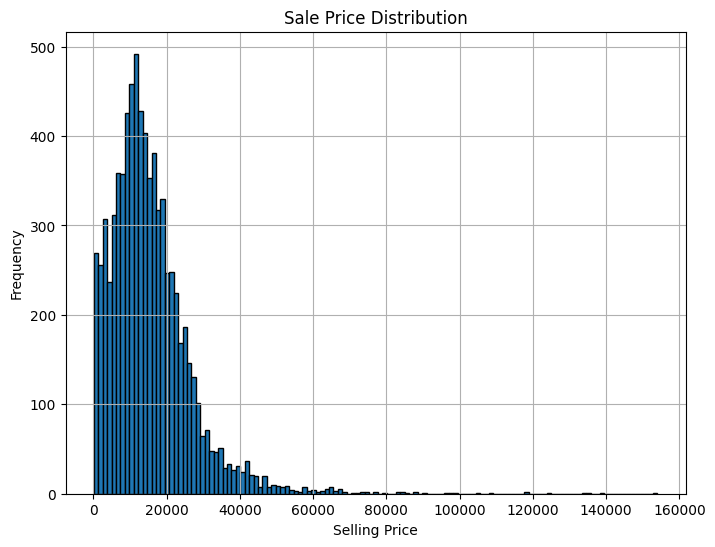

In [7]:
# Create a histogram of sale prices
plt.figure(figsize=(8, 6))  # Set figure size (optional)
plt.hist(df['sellingprice'], bins='auto', edgecolor='black')  # Create histogram
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


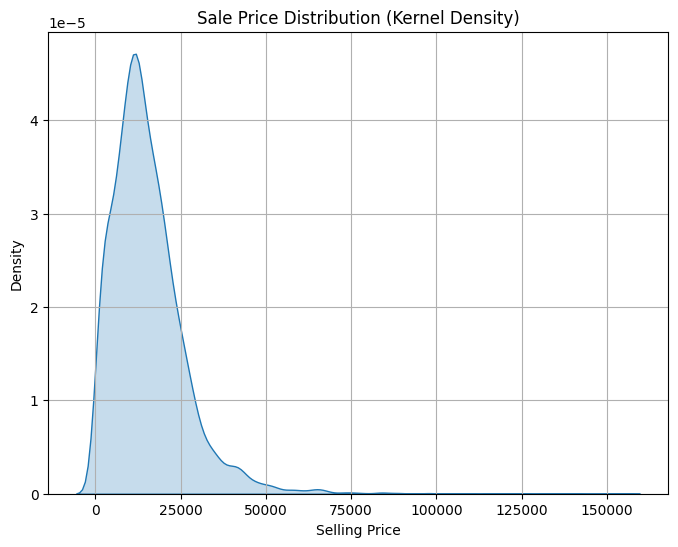

In [8]:
# Kernel Density Plot
plt.figure(figsize=(8, 6))  # Set figure size (optional)
sns.kdeplot(df['sellingprice'], fill=True)  # Use seaborn for kernel density with fill
plt.xlabel('Selling Price')
plt.ylabel('Density')
plt.title('Sale Price Distribution (Kernel Density)')
plt.grid(True)
plt.show()

In [9]:
# List of categorical variables to encode
categorical_cols = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'color', 'interior', 'seller']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Label encode categorical variables in the original DataFrame
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Check the encoded DataFrame
print(df_encoded.head(2))


   year  odometer      mmr  sellingprice  \
0  2015   16639.0  20500.0       21500.0   
1  2015    9393.0  20800.0       21500.0   

                                  saledate  make_Audi  make_BMW  make_Bentley  \
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)      False     False         False   
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)      False     False         False   

   make_Buick  make_Cadillac  ...  seller_woodhouse ford inc  \
0       False          False  ...                      False   
1       False          False  ...                      False   

   seller_woodhouse sioux city inc  seller_world omni financial corporation  \
0                            False                                    False   
1                            False                                    False   

   seller_worthington ford  seller_wright-patt credit union  \
0                    False                            False   
1                    False                            False   

  

In [10]:
# Define the numerical features to be scaled
numerical_features = ['year', 'odometer', 'mmr', 'sellingprice']

# Create a MinMaxScaler object
min_max_scaler = MinMaxScaler()

# Create a StandardScaler object (not used in this code snippet but could be used elsewhere)
standard_scaler = StandardScaler()

# Apply Min-Max scaling to numerical features and update the dataframe with scaled values
df[numerical_features] = min_max_scaler.fit_transform(df[numerical_features])



In [11]:
# Assuming 'manufacturing_year' is a column in your DataFrame containing the year of manufacture for each vehicle

# Import the datetime module to work with dates and times
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Calculate the age of the vehicle by subtracting the manufacturing year from the current year
df['vehicle_age'] = current_year - df['year']

# Retrieve the age of the first vehicle in the DataFrame
df['vehicle_age'].iloc[0]


2023.0

In [12]:

X = df.drop(columns=['sellingprice','saledate'])  # Extracting features by dropping 'sellingprice' and 'saledate' columns
y = df['sellingprice']  # Extracting the target variable 'sellingprice'

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set - Features:", X_train.shape)  # Printing the shape of the training set features
print("Training set - Target:", y_train.shape)    # Printing the shape of the training set target variable
print("Testing set - Features:", X_test.shape)    # Printing the shape of the testing set features
print("Testing set - Target:", y_test.shape)      # Printing the shape of the testing set target variable

X.head(2)  # Displaying the first two rows of the feature dataset


Training set - Features: (6232, 15)
Training set - Target: (6232,)
Testing set - Features: (1558, 15)
Testing set - Target: (1558,)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,vehicle_age
0,1.0,19,412,346,25,0,4642,1,37,0.016638,16,1,503,0.137439,2023.0
1,1.0,19,412,346,25,0,4641,1,37,0.009392,16,0,503,0.139453,2023.0


In [13]:

# Initialize Linear Regression model
model = LinearRegression()  # Creating an instance of Linear Regression model

# Train the model on the training data
model.fit(X_train, y_train)  # Fitting the model to the training data

# Make predictions on the testing data
y_pred = model.predict(X_test)  # Predicting outputs using the trained model and testing data

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)  # Calculating Mean Absolute Error
print("Mean Absolute Error:", mae)  # Printing the Mean Absolute Error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error
print("Mean Squared Error (MSE):", mse)  # Printing the Mean Squared Error

# Calculate R-squared (R^2) score
r2 = r2_score(y_test, y_pred)  # Calculating R-squared (R^2) score
print("R-squared (R^2) Score:", r2)  # Printing the R-squared (R^2) score


Mean Absolute Error: 0.00761665352312328
Mean Squared Error (MSE): 0.00013008993279955817
R-squared (R^2) Score: 0.972796522081389


**There are several options for deploying machine learning models in production, including:**
1. Building a RESTful API (Application Programming Interface)
2. Embedding the model in an application or service
3. Containerizing the model using Docker and deploying it on cloud platforms like AWS, Google Cloud, or Azure
4. Using serverless computing services like AWS Lambda or Google Cloud Functions